# Informal Loan Exploration

In [1]:
import pandas as pd
import numpy as np
import math as math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
# to see all the columns when using head() or describe()
pd.set_option('display.max_columns',60)

In [3]:
df = pd.read_csv("kenya_data/diaries_transactions_all.csv", dtype={'account_startclose_balance': str})

### I first want to at least get the transaction date in the right format, I believe that we should do this for all dates and then save the new data in a csv format.

In [4]:
from datetime import date

# Let us look at the number of informal loans (INFGRP, INFP2P) vs formal loans (FRMLN)

In [26]:
df["trx_family_code"].describe()

count     483949
unique        44
top         FOOD
freq      163483
Name: trx_family_code, dtype: object

In [27]:
df["trx_family_code"].unique()

array(['INFP2P', 'CASH', 'INFGRP', 'INFSAVHOM', 'COMM', 'MOBMNY', 'SEI',
       'FOOD', 'SUPPCRD', 'FRMLN', 'ARREARS', 'FRMSAVWA', 'CITMPC', 'REI',
       'PERS', 'LAYAWAY', 'ENRGY', 'RG', 'FRMSAVRA', 'OTH', 'OTHER',
       'EDU', 'CLTH', 'RIOI', 'ADVANCE', 'TRNSP', 'EMPLN', 'RR', 'REL',
       'ENT', 'CLN', 'FRMINS', 'ALC', 'H20', 'AGRI', 'MED', 'PAWN',
       'PRCH', 'HSNG', 'PSTHR', 'LOSS', 'SALE', 'NEINCG', 'GIFT'],
      dtype=object)

In [29]:
df["trx_family_code"].value_counts()

FOOD         163483
SEI           71156
ENRGY         25273
COMM          25011
TRNSP         23549
INFGRP        20516
INFP2P        19828
MOBMNY        14665
CITMPC        12193
RR            10958
CLN           10589
H20            8967
AGRI           8115
CASH           7599
INFSAVHOM      7232
EDU            5438
FRMSAVWA       5352
PERS           4522
RIOI           4334
REL            4226
ALC            4144
SUPPCRD        4050
RG             3623
REI            3521
OTH            2938
MED            2389
CLTH           1725
HSNG           1505
FRMLN          1429
ARREARS        1402
FRMSAVRA       1220
PRCH            644
FRMINS          553
NEINCG          354
LAYAWAY         287
ADVANCE         280
SALE            229
ENT             183
PSTHR           163
OTHER           129
EMPLN           111
LOSS             26
GIFT             22
PAWN             16
Name: trx_family_code, dtype: int64

### We see that there are way more informal loans than formal loans. Eventhough micorcredit would probably be considered to be formal loans, I feel like we should also take advantage of the informal loans data.

# Let's only keep the informal loans. We will now look at People to People loans: family code INFP2P. As before there will be all kinds of transactions, not only loans.


In [5]:
dfi = df[df["trx_family_code"] == "INFP2P"]

In [6]:
dfi.head()

,hh_ids,unique_hhs,first_trx_date_hh,last_trx_date_hh,tot_hh_daysofobs,tot_hh_monthsofobs,interview_designation,int_date,int_month,int_year,int_yr_mo,first_int_date,account_ids,unique_accnts,m_ids_owner,unique_hm_owner,account_bsheet_desig,account_startclose_balance,account_formal,account_liquid,first_trx_date_acc,last_trx_date_acc,tot_acc_daysofobs,tot_acc_monthsofobs,trx_id,m_ids_trx,trx_date,trx_month,trx_year,trx_yr_mo,trx_dq_round,trx_stdtime_days_hh,trx_stdtime_mnths_hh,trx_stdtime_days_acc,trx_stdtime_mnths_acc,trx_class_code,trx_class_desc,trx_family_code,trx_family_desc,trx_type_code,trx_type_desc,trx_prx_purpose,trx_prx_purpose_fd,trx_fee,trx_bsheet_direction,trx_mode_code,trx_mode_desc,trx_place_incommunity,trx_distance_km,trx_outlet,trx_direction,trx_value_kes,trx_value_usd,ddd_gift,trx_inkind_units,trx_inkind_value_usd,trx_inkind_value_kes,trx_stdtime_mnths_hh_nr
0,KELDL02,NaN,03sep2012,02oct2013,394,13,04=Diaries Interview,02oct2013,10,2013,2013_10,08sep2012,58134738501900000,1.0,58134383397900000,NaN,Asset,Close,Informal,Less liquid,02oct2013,02oct2013,0,0,108138072959900000,58134383397900000,02oct2013,10,2013,2013_10,18.0,394,13,0,0,findev,"Borrowing, lending, savings or insurance media...",INFP2P,Informal P2P,2731,Friends and Family: Lending,7. Closing Balance--End of last DQ,NaN,0.0,NaN,19.0,CLOSING BALANCE,NaN,NaN,NaN,NaN,0.0,0.00000,0,NaN,NaN,NaN,13.58621
22,KVIHK15,NaN,09sep2012,25sep2013,381,13,04=Diaries Interview,25sep2013,9,2013,2013_09,29aug2012,60136798779200000,NaN,60134381261200000,NaN,Liability,Close,Informal,NaN,09sep2012,25sep2013,381,13,60138053818800000,60134381261200000,25sep2013,9,2013,2013_09,24.0,381,13,381,13,findev,"Borrowing, lending, savings or insurance media...",INFP2P,Informal P2P,2752,Friends and family: Borrowing,7. Closing Balance--End of last DQ,NaN,0.0,NaN,19.0,CLOSING BALANCE,NaN,NaN,NaN,NaN,0.0,0.00000,0,NaN,NaN,NaN,13.13793
38,KNBOK16,NaN,31aug2012,25oct2013,420,14,04=Diaries Interview,25oct2013,10,2013,2013_10,13sep2012,89136781716500000,NaN,64134373843900000,NaN,Liability,Close,Informal,NaN,22apr2013,25oct2013,186,6,89138267636600000,64134373843900000,25oct2013,10,2013,2013_10,21.0,420,14,186,6,findev,"Borrowing, lending, savings or insurance media...",INFP2P,Informal P2P,2747,Informal credit at a store,7. Closing Balance--End of last DQ,NaN,0.0,NaN,19.0,CLOSING BALANCE,NaN,NaN,NaN,NaN,0.0,0.00000,0,NaN,NaN,NaN,14.48276
41,KNBOK36,NaN,01nov2012,23oct2013,356,12,04=Diaries Interview,22oct2013,10,2013,2013_10,19dec2012,50135823857900000,NaN,79134985767500000,NaN,Liability,Close,Informal,NaN,19dec2012,23oct2013,308,10,89138242747400000,79134985767500000,22oct2013,10,2013,2013_10,17.0,355,12,307,10,findev,"Borrowing, lending, savings or insurance media...",INFP2P,Informal P2P,2752,Friends and family: Borrowing,7. Closing Balance--End of last DQ,NaN,0.0,NaN,19.0,CLOSING BALANCE,NaN,NaN,NaN,NaN,2000.0,23.52941,0,NaN,NaN,NaN,12.24138
48,KELDK13,NaN,01aug2012,23oct2013,448,15,04=Diaries Interview,09oct2013,10,2013,2013_10,27jul2012,105137576968500000,NaN,56134337440100000,NaN,Asset,Close,Informal,Less liquid,01jul2013,09oct2013,100,3,105138129661800000,56134337440100000,09oct2013,10,2013,2013_10,18.0,434,14,100,3,findev,"Borrowing, lending, savings or insurance media...",INFP2P,Informal P2P,2731,Friends and Family: Lending,7. Closing Balance--End of last DQ,NaN,0.0,NaN,19.0,CLOSING BALANCE,NaN,NaN,NaN,NaN,0.0,0.00000,0,NaN,NaN,NaN,14.96552


### I want to check some other columns to see if these are really all only loans.

In [7]:
dfi["trx_class_code"].describe()

count      19828
unique         1
top       findev
freq       19828
Name: trx_class_code, dtype: object

### They are all financial devices, which is good.

In [8]:
dfi["trx_type_desc"].describe()

count                          19828
unique                             8
top       Informal credit at a store
freq                           12022
Name: trx_type_desc, dtype: object

In [9]:
dfi["trx_type_desc"].unique()

array(['Friends and Family: Lending', 'Friends and family: Borrowing',
       'Informal credit at a store', 'Moneylender or Shylock Borrowing',
       'Use money guard', 'Credit Given to Clients', 'Act as money guard',
       "Private investment in someone else's business"], dtype=object)

In [10]:
dfi["account_bsheet_desig"].unique()

array(['Asset', 'Liability'], dtype=object)

### I just checked the handbook and it is not the case that all transactions with the code "INFGRP" are loans, there also are other kinds of financial devices with that code. We will need to additionally screen for the trx_type_code 3395.

In [11]:
dfi = dfi[dfi["account_bsheet_desig"]=="Liability"]

In [13]:
dfi.shape

(14755, 58)

## There seem to be way more transactions linked to people to people loans.

In [14]:
dfi.head()

,hh_ids,unique_hhs,first_trx_date_hh,last_trx_date_hh,tot_hh_daysofobs,tot_hh_monthsofobs,interview_designation,int_date,int_month,int_year,int_yr_mo,first_int_date,account_ids,unique_accnts,m_ids_owner,unique_hm_owner,account_bsheet_desig,account_startclose_balance,account_formal,account_liquid,first_trx_date_acc,last_trx_date_acc,tot_acc_daysofobs,tot_acc_monthsofobs,trx_id,m_ids_trx,trx_date,trx_month,trx_year,trx_yr_mo,trx_dq_round,trx_stdtime_days_hh,trx_stdtime_mnths_hh,trx_stdtime_days_acc,trx_stdtime_mnths_acc,trx_class_code,trx_class_desc,trx_family_code,trx_family_desc,trx_type_code,trx_type_desc,trx_prx_purpose,trx_prx_purpose_fd,trx_fee,trx_bsheet_direction,trx_mode_code,trx_mode_desc,trx_place_incommunity,trx_distance_km,trx_outlet,trx_direction,trx_value_kes,trx_value_usd,ddd_gift,trx_inkind_units,trx_inkind_value_usd,trx_inkind_value_kes,trx_stdtime_mnths_hh_nr
22,KVIHK15,NaN,09sep2012,25sep2013,381,13,04=Diaries Interview,25sep2013,9,2013,2013_09,29aug2012,60136798779200000,NaN,60134381261200000,NaN,Liability,Close,Informal,NaN,09sep2012,25sep2013,381,13,60138053818800000,60134381261200000,25sep2013,9,2013,2013_09,24.0,381,13,381,13,findev,"Borrowing, lending, savings or insurance media...",INFP2P,Informal P2P,2752,Friends and family: Borrowing,7. Closing Balance--End of last DQ,NaN,0.0,NaN,19.0,CLOSING BALANCE,NaN,NaN,NaN,NaN,0.0,0.000000,0,NaN,NaN,NaN,13.13793
38,KNBOK16,NaN,31aug2012,25oct2013,420,14,04=Diaries Interview,25oct2013,10,2013,2013_10,13sep2012,89136781716500000,NaN,64134373843900000,NaN,Liability,Close,Informal,NaN,22apr2013,25oct2013,186,6,89138267636600000,64134373843900000,25oct2013,10,2013,2013_10,21.0,420,14,186,6,findev,"Borrowing, lending, savings or insurance media...",INFP2P,Informal P2P,2747,Informal credit at a store,7. Closing Balance--End of last DQ,NaN,0.0,NaN,19.0,CLOSING BALANCE,NaN,NaN,NaN,NaN,0.0,0.000000,0,NaN,NaN,NaN,14.48276
41,KNBOK36,NaN,01nov2012,23oct2013,356,12,04=Diaries Interview,22oct2013,10,2013,2013_10,19dec2012,50135823857900000,NaN,79134985767500000,NaN,Liability,Close,Informal,NaN,19dec2012,23oct2013,308,10,89138242747400000,79134985767500000,22oct2013,10,2013,2013_10,17.0,355,12,307,10,findev,"Borrowing, lending, savings or insurance media...",INFP2P,Informal P2P,2752,Friends and family: Borrowing,7. Closing Balance--End of last DQ,NaN,0.0,NaN,19.0,CLOSING BALANCE,NaN,NaN,NaN,NaN,2000.0,23.529410,0,NaN,NaN,NaN,12.24138
49,KMOMB17,NaN,07sep2012,04oct2013,392,13,04=Diaries Interview,02oct2013,10,2013,2013_10,10sep2012,57136758121100000,NaN,57134365483700000,NaN,Liability,Close,Informal,NaN,24apr2013,02oct2013,161,5,57138071440700000,57134365483700000,02oct2013,10,2013,2013_10,16.0,390,13,161,5,findev,"Borrowing, lending, savings or insurance media...",INFP2P,Informal P2P,3246,Moneylender or Shylock Borrowing,7. Closing Balance--End of last DQ,NaN,0.0,NaN,19.0,CLOSING BALANCE,NaN,NaN,NaN,NaN,0.0,0.000000,0,NaN,NaN,NaN,13.44828
63,KMOMK17,NaN,01oct2012,16nov2013,411,14,04=Diaries Interview,20apr2013,4,2013,2013_04,06oct2012,61134770878700000,NaN,61134407559000000,NaN,Liability,NaN,Informal,NaN,01oct2012,30oct2013,394,13,61136644449000000,61134407559000000,11apr2013,4,2013,2013_04,10.0,192,6,192,6,findev,"Borrowing, lending, savings or insurance media...",INFP2P,Informal P2P,2747,Informal credit at a store,2. New purchases on credit,New borrowing on financial liability,0.0,Increase,8.0,Purchase on credit/arrears,NaN,NaN,NaN,Inflow,104.0,1.223529,0,NaN,NaN,NaN,6.62069


In [15]:
dfi["account_bsheet_desig"].unique()

array(['Liability'], dtype=object)

In [16]:
dfi["trx_type_desc"].unique()

array(['Friends and family: Borrowing', 'Informal credit at a store',
       'Moneylender or Shylock Borrowing', 'Act as money guard'],
      dtype=object)

### The last time I checked for the height of the loans using just a histogram for all the values associated to that code. But this does not actually make sense, since we are interested in the amount of the starting balance. Or when they take a new borrowing on an old loan, how much that is. So maybe the best way to get an idea of the distribution of the heights of loans would be to make a histogram of all starting balances and all new borrowing transactions. Let's see where that is recorded.

In [17]:
dfi["trx_prx_purpose"].unique()

array(['7. Closing Balance--End of last DQ', '2. New purchases on credit',
       '1. Starting balance (today)',
       '4. Closing Balance--End of last DQ', '5. Interest accruing',
       '4. Any known fees', 'INCREASE--Unexplained balance adjustment',
       '6. Loan written off', '3. Payments',
       'DECREASE--Unexplained balance adjustment',
       '2. Accepting new deposits', '6. Debt written off',
       '2. New borrowing', '3. Providing withdrawals'], dtype=object)

###  We only want to keep the columns "starting balance", "new borrowing", "new purchases on credit" I believe. But to make sure, let's see how often there is an unexplained balance increase or decrease.

In [18]:
dfi[(dfi["trx_prx_purpose"]=="INCREASE--Unexplained balance adjustment")|(dfi["trx_prx_purpose"]=="DECREASE--Unexplained balance adjustment")].shape

(88, 58)

### Ok not too often. I wonder if these are huge amounts. 

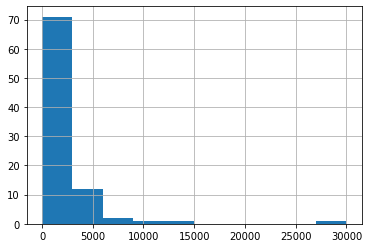

In [19]:
dfi[(dfi["trx_prx_purpose"]=="INCREASE--Unexplained balance adjustment")|(dfi["trx_prx_purpose"]=="DECREASE--Unexplained balance adjustment")]["trx_value_kes"].hist()

In [20]:
dfi[(dfi["trx_prx_purpose"]=="INCREASE--Unexplained balance adjustment")|(dfi["trx_prx_purpose"]=="DECREASE--Unexplained balance adjustment")]["trx_value_kes"].mean()

1899.1704545454545

### Ok not tiny. I wonder how many unique accounts this concerns.

In [22]:
dfi[(dfi["trx_prx_purpose"]=="INCREASE--Unexplained balance adjustment")|(dfi["trx_prx_purpose"]=="DECREASE--Unexplained balance adjustment")]["account_ids"].shape

(88,)

In [23]:
dfi[(dfi["trx_prx_purpose"]=="INCREASE--Unexplained balance adjustment")|(dfi["trx_prx_purpose"]=="DECREASE--Unexplained balance adjustment")][["trx_bsheet_direction", "trx_direction","trx_value_kes"]].sample(5)

,trx_bsheet_direction,trx_direction,trx_value_kes
25321,Decrease,NaN,250.0
3738,Decrease,NaN,3822.0
16989,Increase,NaN,390.0
2667,Increase,NaN,1050.0
4345,Increase,NaN,2000.0


### We definitely need to think about what to do about these unexplained movements.

# Let us now look at the height of the informal loans.

In [25]:
dfi["trx_prx_purpose"].unique()

array(['7. Closing Balance--End of last DQ', '2. New purchases on credit',
       '1. Starting balance (today)',
       '4. Closing Balance--End of last DQ', '5. Interest accruing',
       '4. Any known fees', 'INCREASE--Unexplained balance adjustment',
       '6. Loan written off', '3. Payments',
       'DECREASE--Unexplained balance adjustment',
       '2. Accepting new deposits', '6. Debt written off',
       '2. New borrowing', '3. Providing withdrawals'], dtype=object)

In [30]:
dfi_start = dfi[(dfi["trx_prx_purpose"]=="1. Starting balance (today)")|(dfi["trx_prx_purpose"]=="2. New borrowing")|(dfi["trx_prx_purpose"]=="2. New purchases on credit")|(dfi["trx_prx_purpose"]=="INCREASE--Unexplained balance adjustment")|(dfi["trx_prx_purpose"]=="2. Accepting new deposits")]

In [35]:
dfi_start["trx_value_kes"].describe()

count     11175.000000
mean        364.090112
std        4395.459854
min           0.000000
25%          20.000000
50%          30.000000
75%         100.000000
max      280000.000000
Name: trx_value_kes, dtype: float64

In [47]:
dfi_start["trx_value_kes"].median()

30.0

### The median is very low!

In [44]:
dfi_start[dfi_start["trx_value_kes"]>=10000]["trx_value_kes"].describe()

count        62.000000
mean      28608.225806
std       51415.683629
min       10000.000000
25%       10000.000000
50%       15000.000000
75%       24250.000000
max      280000.000000
Name: trx_value_kes, dtype: float64

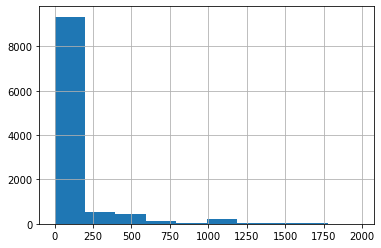

In [48]:
dfi_start[dfi_start["trx_value_kes"]<2000]["trx_value_kes"].hist()

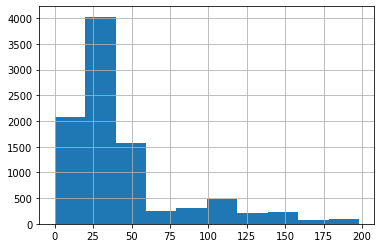

In [52]:
dfi_start[dfi_start["trx_value_kes"]<200]["trx_value_kes"].hist()

### Let us see if we also have negative values, i.e. mistakes here.

In [53]:
dfi[dfi["trx_value_kes"]<0]

,hh_ids,unique_hhs,first_trx_date_hh,last_trx_date_hh,tot_hh_daysofobs,tot_hh_monthsofobs,interview_designation,int_date,int_month,int_year,int_yr_mo,first_int_date,account_ids,unique_accnts,m_ids_owner,unique_hm_owner,account_bsheet_desig,account_startclose_balance,account_formal,account_liquid,first_trx_date_acc,last_trx_date_acc,tot_acc_daysofobs,tot_acc_monthsofobs,trx_id,m_ids_trx,trx_date,trx_month,trx_year,trx_yr_mo,trx_dq_round,trx_stdtime_days_hh,trx_stdtime_mnths_hh,trx_stdtime_days_acc,trx_stdtime_mnths_acc,trx_class_code,trx_class_desc,trx_family_code,trx_family_desc,trx_type_code,trx_type_desc,trx_prx_purpose,trx_prx_purpose_fd,trx_fee,trx_bsheet_direction,trx_mode_code,trx_mode_desc,trx_place_incommunity,trx_distance_km,trx_outlet,trx_direction,trx_value_kes,trx_value_usd,ddd_gift,trx_inkind_units,trx_inkind_value_usd,trx_inkind_value_kes,trx_stdtime_mnths_hh_nr
4407,KVIHC14,NaN,03sep2012,24oct2013,416,14,05=Module,06oct2013,10,2013,2013_10,21aug2012,59134794889400000,NaN,59134319827600000,NaN,Liability,Close,Informal,NaN,10nov2012,30sep2013,324,11,105140377133500000,59134319827600000,30sep2013,9,2013,2013_09,22.0,392,13,324,11,findev,"Borrowing, lending, savings or insurance media...",INFP2P,Informal P2P,2752,Friends and family: Borrowing,7. Closing Balance--End of last DQ,NaN,0.0,NaN,19.0,CLOSING BALANCE,NaN,NaN,NaN,NaN,-2300.0,-27.058820,0,NaN,NaN,NaN,13.51724
8871,KMOMK01,NaN,09oct2012,30oct2013,386,13,04=Diaries Interview,25oct2013,10,2013,2013_10,04sep2012,61134977406500000,NaN,61134491524800000,NaN,Liability,Close,Informal,NaN,09oct2012,25oct2013,381,13,51140472649100000,61134491524800000,25oct2013,10,2013,2013_10,16.0,381,13,381,13,findev,"Borrowing, lending, savings or insurance media...",INFP2P,Informal P2P,2747,Informal credit at a store,7. Closing Balance--End of last DQ,NaN,0.0,NaN,19.0,CLOSING BALANCE,NaN,NaN,NaN,NaN,-198.0,-2.329412,0,NaN,NaN,NaN,13.13793
20592,KVIHC08,NaN,17oct2012,30sep2013,348,12,05=Module,29sep2013,9,2013,2013_09,13sep2012,59135530202900000,NaN,59134399259500000,NaN,Liability,Close,Informal,NaN,31oct2012,30sep2013,334,11,105140376666000000,59134399259500000,30sep2013,9,2013,2013_09,21.0,348,12,334,11,findev,"Borrowing, lending, savings or insurance media...",INFP2P,Informal P2P,2747,Informal credit at a store,7. Closing Balance--End of last DQ,NaN,0.0,NaN,19.0,CLOSING BALANCE,NaN,NaN,NaN,NaN,-20.0,-0.235294,0,NaN,NaN,NaN,12.00000
21276,KVIHC05,NaN,17sep2012,01nov2013,410,14,04=Diaries Interview,23sep2013,9,2013,2013_09,29aug2012,59136924177500000,NaN,59134364992800000,NaN,Liability,Close,Informal,NaN,18may2013,01nov2013,167,5,59138168018400000,59134364992800000,23sep2013,9,2013,2013_09,20.0,371,12,128,4,findev,"Borrowing, lending, savings or insurance media...",INFP2P,Informal P2P,2747,Informal credit at a store,7. Closing Balance--End of last DQ,NaN,0.0,NaN,19.0,CLOSING BALANCE,NaN,NaN,NaN,NaN,-20.0,-0.235294,0,NaN,NaN,NaN,12.79310


### Now that I think about it, if the closing balance of a loan is negative, I guess that this means that they payed back more than they had to??

## To see how well we can evaluate whether a person paid back their loan or not, we would need to follow the evolution of a single loan. To this goal I want to choose one loan among the above and follow its evolution. 

In [54]:
dfi["account_ids"].count()

14755

In [55]:
dfi["account_ids"].describe()

count                 14755
unique                 1151
top       61134770878700000
freq                    444
Name: account_ids, dtype: object

In [56]:
import random 
acc = random.choice(dfi["account_ids"].unique())

In [57]:
print(acc)

105137455516300000


### I used a = 105137455516300000.

In [58]:
lna = dfi[dfi["account_ids"]==acc]

In [67]:
print(lna.shape, "\n class:", lna["trx_class_desc"].unique(), "\n type:", lna["trx_type_desc"].unique(), "\n purpose:",lna["trx_prx_purpose"].unique(), "\n purpose_fd:", lna["trx_prx_purpose_fd"].unique())

(29, 58) 
 class: ['Borrowing, lending, savings or insurance mediated through any financial device/ institution'] 
 type: ['Informal credit at a store'] 
 purpose: ['2. New purchases on credit' '3. Payments'
 '7. Closing Balance--End of last DQ'] 
 purpose_fd: ['New borrowing on financial liability' 'Repayment on financial liability'
 nan]


### Let's look at this one account.

In [68]:
lna.sort_values("trx_stdtime_days_acc", inplace=True)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [74]:
lna[~(((lna["trx_bsheet_direction"]=="Increase")&(lna["trx_direction"]=="Inflow")) | ((lna["trx_bsheet_direction"]=="Decrease")&(lna["trx_direction"]=="Outflow")))]

,hh_ids,unique_hhs,first_trx_date_hh,last_trx_date_hh,tot_hh_daysofobs,tot_hh_monthsofobs,interview_designation,int_date,int_month,int_year,int_yr_mo,first_int_date,account_ids,unique_accnts,m_ids_owner,unique_hm_owner,account_bsheet_desig,account_startclose_balance,account_formal,account_liquid,first_trx_date_acc,last_trx_date_acc,tot_acc_daysofobs,tot_acc_monthsofobs,trx_id,m_ids_trx,trx_date,trx_month,trx_year,trx_yr_mo,trx_dq_round,trx_stdtime_days_hh,trx_stdtime_mnths_hh,trx_stdtime_days_acc,trx_stdtime_mnths_acc,trx_class_code,trx_class_desc,trx_family_code,trx_family_desc,trx_type_code,trx_type_desc,trx_prx_purpose,trx_prx_purpose_fd,trx_fee,trx_bsheet_direction,trx_mode_code,trx_mode_desc,trx_place_incommunity,trx_distance_km,trx_outlet,trx_direction,trx_value_kes,trx_value_usd,ddd_gift,trx_inkind_units,trx_inkind_value_usd,trx_inkind_value_kes,trx_stdtime_mnths_hh_nr
25821,KELDK16,NaN,02sep2012,03oct2013,396,13,04=Diaries Interview,03oct2013,10,2013,2013_10,12sep2012,105137455516300000,NaN,65134426405900000,NaN,Liability,Close,Informal,NaN,20jul2013,03oct2013,75,2,105138078961500000,65134426405900000,03oct2013,10,2013,2013_10,18.0,396,13,75,2,findev,"Borrowing, lending, savings or insurance media...",INFP2P,Informal P2P,2747,Informal credit at a store,7. Closing Balance--End of last DQ,NaN,0.0,NaN,19.0,CLOSING BALANCE,NaN,NaN,NaN,NaN,700.0,8.235294,0,NaN,NaN,NaN,13.65517


### Now we want to understand the evolution of the balance of a loan account.

In [75]:
lna.insert(58, "trx_val_dir",np.zeros(lna.shape[0]))

In [76]:
lna.head(1)

,hh_ids,unique_hhs,first_trx_date_hh,last_trx_date_hh,tot_hh_daysofobs,tot_hh_monthsofobs,interview_designation,int_date,int_month,int_year,int_yr_mo,first_int_date,account_ids,unique_accnts,m_ids_owner,unique_hm_owner,account_bsheet_desig,account_startclose_balance,account_formal,account_liquid,first_trx_date_acc,last_trx_date_acc,tot_acc_daysofobs,tot_acc_monthsofobs,trx_id,m_ids_trx,trx_date,trx_month,trx_year,trx_yr_mo,trx_dq_round,trx_stdtime_days_hh,trx_stdtime_mnths_hh,trx_stdtime_days_acc,trx_stdtime_mnths_acc,trx_class_code,trx_class_desc,trx_family_code,trx_family_desc,trx_type_code,trx_type_desc,trx_prx_purpose,trx_prx_purpose_fd,trx_fee,trx_bsheet_direction,trx_mode_code,trx_mode_desc,trx_place_incommunity,trx_distance_km,trx_outlet,trx_direction,trx_value_kes,trx_value_usd,ddd_gift,trx_inkind_units,trx_inkind_value_usd,trx_inkind_value_kes,trx_stdtime_mnths_hh_nr,trx_val_dir
296410,KELDK16,NaN,02sep2012,03oct2013,396,13,04=Diaries Interview,23jul2013,7,2013,2013_07,12sep2012,105137455516300000,1.0,65134426405900000,NaN,Liability,NaN,Informal,NaN,20jul2013,03oct2013,75,2,105137455534600000,65134426405900000,20jul2013,7,2013,2013_07,13.0,321,11,0,0,findev,"Borrowing, lending, savings or insurance media...",INFP2P,Informal P2P,2747,Informal credit at a store,2. New purchases on credit,New borrowing on financial liability,0.0,Increase,8.0,Purchase on credit/arrears,1.0,0.0,"10=Shop, supermarket or other retail outlet",Inflow,1000.0,11.76471,0,NaN,NaN,NaN,11.06897,0.0


In [77]:
for index, row in lna.iterrows():
    if lna.loc[index,"trx_bsheet_direction"]=="Increase":
        lna.at[index,"trx_val_dir"] = lna.loc[index,"trx_value_kes"]
    elif lna.loc[index,"trx_bsheet_direction"]=="Decrease":
        lna.at[index,"trx_val_dir"] = -lna.loc[index,"trx_value_kes"]
    else:
        print("Error neither increase nor decrease at index" + str(index))

Error neither increase nor decrease at index25821


In [78]:
lna[["trx_stdtime_days_acc","trx_value_kes","trx_prx_purpose","trx_direction","trx_bsheet_direction","trx_val_dir"]]

,trx_stdtime_days_acc,trx_value_kes,trx_prx_purpose,trx_direction,trx_bsheet_direction,trx_val_dir
296410,0,1000.0,2. New purchases on credit,Inflow,Increase,1000.0
401781,1,130.0,2. New purchases on credit,Inflow,Increase,130.0
280780,6,30.0,2. New purchases on credit,Inflow,Increase,30.0
245640,10,30.0,2. New purchases on credit,Inflow,Increase,30.0
232665,11,30.0,2. New purchases on credit,Inflow,Increase,30.0
383138,13,30.0,2. New purchases on credit,Inflow,Increase,30.0
363364,15,100.0,2. New purchases on credit,Inflow,Increase,100.0
397900,16,30.0,2. New purchases on credit,Inflow,Increase,30.0
367198,16,100.0,2. New purchases on credit,Inflow,Increase,100.0
215250,18,30.0,2. New purchases on credit,Inflow,Increase,30.0


In [79]:
lna.insert(59,"bal_evol",np.zeros(lna.shape[0]))

In [80]:
s=0
for index,row in lna.iterrows():
    s+=lna.loc[index,"trx_val_dir"]
    lna.at[index,"bal_evol"]=s

In [81]:
lna[["trx_stdtime_days_acc","trx_value_kes","trx_prx_purpose","trx_direction","trx_bsheet_direction","trx_val_dir","bal_evol"]]

,trx_stdtime_days_acc,trx_value_kes,trx_prx_purpose,trx_direction,trx_bsheet_direction,trx_val_dir,bal_evol
296410,0,1000.0,2. New purchases on credit,Inflow,Increase,1000.0,1000.0
401781,1,130.0,2. New purchases on credit,Inflow,Increase,130.0,1130.0
280780,6,30.0,2. New purchases on credit,Inflow,Increase,30.0,1160.0
245640,10,30.0,2. New purchases on credit,Inflow,Increase,30.0,1190.0
232665,11,30.0,2. New purchases on credit,Inflow,Increase,30.0,1220.0
383138,13,30.0,2. New purchases on credit,Inflow,Increase,30.0,1250.0
363364,15,100.0,2. New purchases on credit,Inflow,Increase,100.0,1350.0
397900,16,30.0,2. New purchases on credit,Inflow,Increase,30.0,1380.0
367198,16,100.0,2. New purchases on credit,Inflow,Increase,100.0,1480.0
215250,18,30.0,2. New purchases on credit,Inflow,Increase,30.0,1510.0


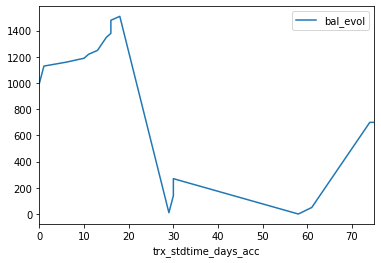

In [82]:
lna.plot(x="trx_stdtime_days_acc",y="bal_evol")

## I am not sure if it makes sense to look at these purchases on credit. But at the same time, here in the US that is exactly what most people get assessed on.
## So I believe that these purchases on credit should maybe be used to predict whether people will pay back their formal loan. This seems to be also reasonable because we have way more of these purchases on credit.
## I think that it is best to look at the different kinds of informal loans seperately.

In [83]:
dfi[dfi["trx_type_desc"]=="Informal credit at a store"]["trx_value_kes"].mean()

152.18158376310097

In [84]:
dfi[dfi["trx_type_desc"]=="Informal credit at a store"]["trx_value_kes"].shape

(12022,)

In [85]:
dfi.shape

(14755, 58)

## We see that the biggest chunk of informal loans is from purchases on credit at a store.

In [88]:
dfi["trx_type_desc"].unique()

array(['Friends and family: Borrowing', 'Informal credit at a store',
       'Moneylender or Shylock Borrowing', 'Act as money guard'],
      dtype=object)

In [93]:
dfi[dfi["trx_type_desc"]=="Friends and family: Borrowing"].shape

(2073, 58)

In [92]:
df[df["trx_type_desc"]=="Friends and family: Borrowing"].shape

(2073, 58)

In [94]:
df[df["trx_type_desc"]=="Moneylender or Shylock Borrowing"].shape

(211, 58)

In [95]:
dfi[dfi["trx_type_desc"]=="Moneylender or Shylock Borrowing"].shape

(211, 58)

In [97]:
dfi[dfi["trx_type_desc"]=="Act as money guard"].shape

(449, 58)

In [98]:
df[df["trx_type_desc"]=="Act as money guard"].shape

(449, 58)

# Exploration of Shylock loans.

### I just checked the whole data set as well, in order to make sure that we captured all entries of that type.

In [99]:
shylock = dfi[dfi["trx_type_desc"]=="Moneylender or Shylock Borrowing"]

In [101]:
len(shylock["account_ids"].unique())

39

In [103]:
acc = random.choice(shylock["account_ids"].unique())

In [104]:
print(acc)

59135867007700000


### I used 59135867007700000

In [107]:
lna = dfi[dfi["account_ids"]==acc]
lna.shape

(1, 58)

In [106]:
print(lna.shape, "\n class:", lna["trx_class_desc"].unique(), "\n type:", lna["trx_type_desc"].unique(), "\n purpose:",lna["trx_prx_purpose"].unique(), "\n purpose_fd:", lna["trx_prx_purpose_fd"].unique())

(1, 58) 
 class: ['Borrowing, lending, savings or insurance mediated through any financial device/ institution'] 
 type: ['Moneylender or Shylock Borrowing'] 
 purpose: ['7. Closing Balance--End of last DQ'] 
 purpose_fd: [nan]


### Let's look at this one account.

In [108]:
lna.sort_values("trx_stdtime_days_acc", inplace=True)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [109]:
lna

,hh_ids,unique_hhs,first_trx_date_hh,last_trx_date_hh,tot_hh_daysofobs,tot_hh_monthsofobs,interview_designation,int_date,int_month,int_year,int_yr_mo,first_int_date,account_ids,unique_accnts,m_ids_owner,unique_hm_owner,account_bsheet_desig,account_startclose_balance,account_formal,account_liquid,first_trx_date_acc,last_trx_date_acc,tot_acc_daysofobs,tot_acc_monthsofobs,trx_id,m_ids_trx,trx_date,trx_month,trx_year,trx_yr_mo,trx_dq_round,trx_stdtime_days_hh,trx_stdtime_mnths_hh,trx_stdtime_days_acc,trx_stdtime_mnths_acc,trx_class_code,trx_class_desc,trx_family_code,trx_family_desc,trx_type_code,trx_type_desc,trx_prx_purpose,trx_prx_purpose_fd,trx_fee,trx_bsheet_direction,trx_mode_code,trx_mode_desc,trx_place_incommunity,trx_distance_km,trx_outlet,trx_direction,trx_value_kes,trx_value_usd,ddd_gift,trx_inkind_units,trx_inkind_value_usd,trx_inkind_value_kes,trx_stdtime_mnths_hh_nr
16578,KVIHC26,NaN,08sep2012,30sep2013,387,13,04=Diaries Interview,19sep2013,9,2013,2013_09,24aug2012,59135867007700000,1.0,59134329488400000,NaN,Liability,Close,Informal,NaN,19sep2013,19sep2013,0,0,59138130021100000,59134329488400000,19sep2013,9,2013,2013_09,18.0,376,12,0,0,findev,"Borrowing, lending, savings or insurance media...",INFP2P,Informal P2P,3246,Moneylender or Shylock Borrowing,7. Closing Balance--End of last DQ,NaN,0.0,NaN,19.0,CLOSING BALANCE,NaN,NaN,NaN,NaN,0.0,0.0,0,NaN,NaN,NaN,12.96552


#### Weird that this account only has 1 entry. Let's see if there are any transactions associated with that account that are not under the category Shylock borrowing.

In [111]:
df[df["account_ids"]==acc].shape

(1, 58)

#### Thankfully there don't seem to be any. So let's look at a different account now.

In [112]:
acc = random.choice(shylock["account_ids"].unique())

In [113]:
print(acc)

63135892235600000


### I used a = 63135892235600000.

In [114]:
lna = dfi[dfi["account_ids"]==acc]

In [115]:
print(lna.shape, "\n class:", lna["trx_class_desc"].unique(), "\n type:", lna["trx_type_desc"].unique(), "\n purpose:",lna["trx_prx_purpose"].unique(), "\n purpose_fd:", lna["trx_prx_purpose_fd"].unique())

(4, 58) 
 class: ['Borrowing, lending, savings or insurance mediated through any financial device/ institution'] 
 type: ['Moneylender or Shylock Borrowing'] 
 purpose: ['7. Closing Balance--End of last DQ' '5. Interest accruing'
 '2. New borrowing' '3. Payments'] 
 purpose_fd: [nan 'New borrowing on financial liability'
 'Repayment on financial liability']


### Let's look at this one account.

In [116]:
lna.sort_values("trx_stdtime_days_acc", inplace=True)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [117]:
lna[~(((lna["trx_bsheet_direction"]=="Increase")&(lna["trx_direction"]=="Inflow")) | ((lna["trx_bsheet_direction"]=="Decrease")&(lna["trx_direction"]=="Outflow")))]

,hh_ids,unique_hhs,first_trx_date_hh,last_trx_date_hh,tot_hh_daysofobs,tot_hh_monthsofobs,interview_designation,int_date,int_month,int_year,int_yr_mo,first_int_date,account_ids,unique_accnts,m_ids_owner,unique_hm_owner,account_bsheet_desig,account_startclose_balance,account_formal,account_liquid,first_trx_date_acc,last_trx_date_acc,tot_acc_daysofobs,tot_acc_monthsofobs,trx_id,m_ids_trx,trx_date,trx_month,trx_year,trx_yr_mo,trx_dq_round,trx_stdtime_days_hh,trx_stdtime_mnths_hh,trx_stdtime_days_acc,trx_stdtime_mnths_acc,trx_class_code,trx_class_desc,trx_family_code,trx_family_desc,trx_type_code,trx_type_desc,trx_prx_purpose,trx_prx_purpose_fd,trx_fee,trx_bsheet_direction,trx_mode_code,trx_mode_desc,trx_place_incommunity,trx_distance_km,trx_outlet,trx_direction,trx_value_kes,trx_value_usd,ddd_gift,trx_inkind_units,trx_inkind_value_usd,trx_inkind_value_kes,trx_stdtime_mnths_hh_nr
4352,KMAKE09,NaN,01oct2012,09oct2013,373,12,04=Diaries Interview,09jan2013,1,2013,2013_01,31aug2012,63135892235600000,NaN,63134390012700000,NaN,Liability,NaN,Informal,NaN,22nov2012,09oct2013,321,11,63135892321000000,63134390012700000,22dec2012,12,2012,2012_12,5.0,82,2,30,1,findev,"Borrowing, lending, savings or insurance media...",INFP2P,Informal P2P,3246,Moneylender or Shylock Borrowing,5. Interest accruing,NaN,0.0,Increase,1.0,Cash,NaN,NaN,NaN,NaN,3000.0,35.29412,0,NaN,NaN,NaN,2.827586
2134,KMAKE09,NaN,01oct2012,09oct2013,373,12,05=Module,09oct2013,10,2013,2013_10,31aug2012,63135892235600000,NaN,63134390012700000,NaN,Liability,Close,Informal,NaN,22nov2012,09oct2013,321,11,84140356446600000,63134390012700000,09oct2013,10,2013,2013_10,22.0,373,12,321,11,findev,"Borrowing, lending, savings or insurance media...",INFP2P,Informal P2P,3246,Moneylender or Shylock Borrowing,7. Closing Balance--End of last DQ,NaN,0.0,NaN,19.0,CLOSING BALANCE,NaN,NaN,NaN,NaN,0.0,0.00000,0,NaN,NaN,NaN,12.862070


### Now we want to understand the evolution of the balance of a loan account.

In [118]:
lna.insert(58, "trx_val_dir",np.zeros(lna.shape[0]))

In [119]:
lna.head(1)

,hh_ids,unique_hhs,first_trx_date_hh,last_trx_date_hh,tot_hh_daysofobs,tot_hh_monthsofobs,interview_designation,int_date,int_month,int_year,int_yr_mo,first_int_date,account_ids,unique_accnts,m_ids_owner,unique_hm_owner,account_bsheet_desig,account_startclose_balance,account_formal,account_liquid,first_trx_date_acc,last_trx_date_acc,tot_acc_daysofobs,tot_acc_monthsofobs,trx_id,m_ids_trx,trx_date,trx_month,trx_year,trx_yr_mo,trx_dq_round,trx_stdtime_days_hh,trx_stdtime_mnths_hh,trx_stdtime_days_acc,trx_stdtime_mnths_acc,trx_class_code,trx_class_desc,trx_family_code,trx_family_desc,trx_type_code,trx_type_desc,trx_prx_purpose,trx_prx_purpose_fd,trx_fee,trx_bsheet_direction,trx_mode_code,trx_mode_desc,trx_place_incommunity,trx_distance_km,trx_outlet,trx_direction,trx_value_kes,trx_value_usd,ddd_gift,trx_inkind_units,trx_inkind_value_usd,trx_inkind_value_kes,trx_stdtime_mnths_hh_nr,trx_val_dir
50716,KMAKE09,NaN,01oct2012,09oct2013,373,12,04=Diaries Interview,09jan2013,1,2013,2013_01,31aug2012,63135892235600000,1.0,63134390012700000,NaN,Liability,NaN,Informal,NaN,22nov2012,09oct2013,321,11,63135892260700000,63134390012700000,22nov2012,11,2012,2012_11,5.0,52,1,0,0,findev,"Borrowing, lending, savings or insurance media...",INFP2P,Informal P2P,3246,Moneylender or Shylock Borrowing,2. New borrowing,New borrowing on financial liability,0.0,Increase,1.0,Cash,1.0,0.0,13=Private individual or household,Inflow,10000.0,117.6471,0,NaN,NaN,NaN,1.793103,0.0


In [120]:
for index, row in lna.iterrows():
    if lna.loc[index,"trx_bsheet_direction"]=="Increase":
        lna.at[index,"trx_val_dir"] = lna.loc[index,"trx_value_kes"]
    elif lna.loc[index,"trx_bsheet_direction"]=="Decrease":
        lna.at[index,"trx_val_dir"] = -lna.loc[index,"trx_value_kes"]
    else:
        print("Error neither increase nor decrease at index" + str(index))

Error neither increase nor decrease at index2134


In [121]:
lna[["trx_stdtime_days_acc","trx_value_kes","trx_prx_purpose","trx_direction","trx_bsheet_direction","trx_val_dir"]]

,trx_stdtime_days_acc,trx_value_kes,trx_prx_purpose,trx_direction,trx_bsheet_direction,trx_val_dir
50716,0,10000.0,2. New borrowing,Inflow,Increase,10000.0
4352,30,3000.0,5. Interest accruing,NaN,Increase,3000.0
325405,30,13000.0,3. Payments,Outflow,Decrease,-13000.0
2134,321,0.0,7. Closing Balance--End of last DQ,NaN,NaN,0.0


In [122]:
lna.insert(59,"bal_evol",np.zeros(lna.shape[0]))

In [123]:
s=0
for index,row in lna.iterrows():
    s+=lna.loc[index,"trx_val_dir"]
    lna.at[index,"bal_evol"]=s

In [127]:
lna[["trx_stdtime_days_acc","trx_value_kes","trx_prx_purpose","trx_direction","trx_bsheet_direction","trx_date","trx_val_dir","bal_evol"]]

,trx_stdtime_days_acc,trx_value_kes,trx_prx_purpose,trx_direction,trx_bsheet_direction,trx_date,trx_val_dir,bal_evol
50716,0,10000.0,2. New borrowing,Inflow,Increase,22nov2012,10000.0,10000.0
4352,30,3000.0,5. Interest accruing,NaN,Increase,22dec2012,3000.0,13000.0
325405,30,13000.0,3. Payments,Outflow,Decrease,22dec2012,-13000.0,0.0
2134,321,0.0,7. Closing Balance--End of last DQ,NaN,NaN,09oct2013,0.0,0.0


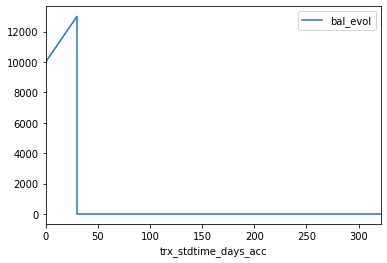

In [128]:
lna.plot(x="trx_stdtime_days_acc",y="bal_evol")

# 3. Shylock Account

In [129]:
acc = random.choice(shylock["account_ids"].unique())

In [130]:
print(acc)

112137885839100000


### I used a = 112137885839100000.

In [131]:
lna = dfi[dfi["account_ids"]==acc]

In [132]:
print(lna.shape, "\n class:", lna["trx_class_desc"].unique(), "\n type:", lna["trx_type_desc"].unique(), "\n purpose:",lna["trx_prx_purpose"].unique(), "\n purpose_fd:", lna["trx_prx_purpose_fd"].unique())

(2, 58) 
 class: ['Borrowing, lending, savings or insurance mediated through any financial device/ institution'] 
 type: ['Moneylender or Shylock Borrowing'] 
 purpose: ['7. Closing Balance--End of last DQ' '2. New borrowing'] 
 purpose_fd: [nan 'New borrowing on financial liability']


### Let's look at this one account.

In [133]:
lna.sort_values("trx_stdtime_days_acc", inplace=True)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [134]:
lna[~(((lna["trx_bsheet_direction"]=="Increase")&(lna["trx_direction"]=="Inflow")) | ((lna["trx_bsheet_direction"]=="Decrease")&(lna["trx_direction"]=="Outflow")))]

,hh_ids,unique_hhs,first_trx_date_hh,last_trx_date_hh,tot_hh_daysofobs,tot_hh_monthsofobs,interview_designation,int_date,int_month,int_year,int_yr_mo,first_int_date,account_ids,unique_accnts,m_ids_owner,unique_hm_owner,account_bsheet_desig,account_startclose_balance,account_formal,account_liquid,first_trx_date_acc,last_trx_date_acc,tot_acc_daysofobs,tot_acc_monthsofobs,trx_id,m_ids_trx,trx_date,trx_month,trx_year,trx_yr_mo,trx_dq_round,trx_stdtime_days_hh,trx_stdtime_mnths_hh,trx_stdtime_days_acc,trx_stdtime_mnths_acc,trx_class_code,trx_class_desc,trx_family_code,trx_family_desc,trx_type_code,trx_type_desc,trx_prx_purpose,trx_prx_purpose_fd,trx_fee,trx_bsheet_direction,trx_mode_code,trx_mode_desc,trx_place_incommunity,trx_distance_km,trx_outlet,trx_direction,trx_value_kes,trx_value_usd,ddd_gift,trx_inkind_units,trx_inkind_value_usd,trx_inkind_value_kes,trx_stdtime_mnths_hh_nr
18907,KMOMK06,NaN,02oct2012,09nov2013,403,13,04=Diaries Interview,06oct2013,10,2013,2013_10,28aug2012,112137885839100000,NaN,61134395033200000,NaN,Liability,Close,Informal,NaN,31aug2013,06oct2013,36,1,112138123862200000,61134395033200000,06oct2013,10,2013,2013_10,21.0,369,12,36,1,findev,"Borrowing, lending, savings or insurance media...",INFP2P,Informal P2P,3246,Moneylender or Shylock Borrowing,7. Closing Balance--End of last DQ,NaN,0.0,NaN,19.0,CLOSING BALANCE,NaN,NaN,NaN,NaN,1000.0,11.76471,0,NaN,NaN,NaN,12.72414


### Now we want to understand the evolution of the balance of a loan account.

In [135]:
lna.insert(58, "trx_val_dir",np.zeros(lna.shape[0]))

In [136]:
lna.head(1)

,hh_ids,unique_hhs,first_trx_date_hh,last_trx_date_hh,tot_hh_daysofobs,tot_hh_monthsofobs,interview_designation,int_date,int_month,int_year,int_yr_mo,first_int_date,account_ids,unique_accnts,m_ids_owner,unique_hm_owner,account_bsheet_desig,account_startclose_balance,account_formal,account_liquid,first_trx_date_acc,last_trx_date_acc,tot_acc_daysofobs,tot_acc_monthsofobs,trx_id,m_ids_trx,trx_date,trx_month,trx_year,trx_yr_mo,trx_dq_round,trx_stdtime_days_hh,trx_stdtime_mnths_hh,trx_stdtime_days_acc,trx_stdtime_mnths_acc,trx_class_code,trx_class_desc,trx_family_code,trx_family_desc,trx_type_code,trx_type_desc,trx_prx_purpose,trx_prx_purpose_fd,trx_fee,trx_bsheet_direction,trx_mode_code,trx_mode_desc,trx_place_incommunity,trx_distance_km,trx_outlet,trx_direction,trx_value_kes,trx_value_usd,ddd_gift,trx_inkind_units,trx_inkind_value_usd,trx_inkind_value_kes,trx_stdtime_mnths_hh_nr,trx_val_dir
137608,KMOMK06,NaN,02oct2012,09nov2013,403,13,04=Diaries Interview,08sep2013,9,2013,2013_09,28aug2012,112137885839100000,1.0,61134395033200000,NaN,Liability,NaN,Informal,NaN,31aug2013,06oct2013,36,1,112137885871400000,61134395033200000,31aug2013,8,2013,2013_08,19.0,333,11,0,0,findev,"Borrowing, lending, savings or insurance media...",INFP2P,Informal P2P,3246,Moneylender or Shylock Borrowing,2. New borrowing,New borrowing on financial liability,0.0,Increase,1.0,Cash,1.0,0.0,13=Private individual or household,Inflow,1000.0,11.76471,0,NaN,NaN,NaN,11.48276,0.0


In [137]:
for index, row in lna.iterrows():
    if lna.loc[index,"trx_bsheet_direction"]=="Increase":
        lna.at[index,"trx_val_dir"] = lna.loc[index,"trx_value_kes"]
    elif lna.loc[index,"trx_bsheet_direction"]=="Decrease":
        lna.at[index,"trx_val_dir"] = -lna.loc[index,"trx_value_kes"]
    else:
        print("Error neither increase nor decrease at index" + str(index))

Error neither increase nor decrease at index18907


In [138]:
lna[["trx_stdtime_days_acc","trx_value_kes","trx_prx_purpose","trx_direction","trx_bsheet_direction","trx_val_dir"]]

,trx_stdtime_days_acc,trx_value_kes,trx_prx_purpose,trx_direction,trx_bsheet_direction,trx_val_dir
137608,0,1000.0,2. New borrowing,Inflow,Increase,1000.0
18907,36,1000.0,7. Closing Balance--End of last DQ,NaN,NaN,0.0


In [139]:
lna.insert(59,"bal_evol",np.zeros(lna.shape[0]))

In [140]:
s=0
for index,row in lna.iterrows():
    s+=lna.loc[index,"trx_val_dir"]
    lna.at[index,"bal_evol"]=s

In [141]:
lna[["trx_stdtime_days_acc","trx_value_kes","trx_prx_purpose","trx_direction","trx_bsheet_direction","trx_date","trx_val_dir","bal_evol"]]

,trx_stdtime_days_acc,trx_value_kes,trx_prx_purpose,trx_direction,trx_bsheet_direction,trx_date,trx_val_dir,bal_evol
137608,0,1000.0,2. New borrowing,Inflow,Increase,31aug2013,1000.0,1000.0
18907,36,1000.0,7. Closing Balance--End of last DQ,NaN,NaN,06oct2013,0.0,1000.0


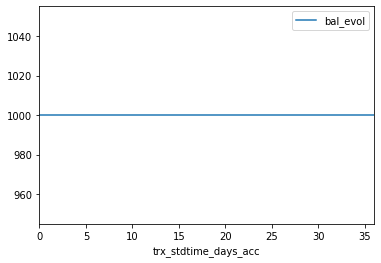

In [142]:
lna.plot(x="trx_stdtime_days_acc",y="bal_evol")

# 4. Shylock account

In [143]:
acc = random.choice(shylock["account_ids"].unique())

In [144]:
print(acc)

89137836043600000


### I used a = 89137836043600000.

In [145]:
lna = dfi[dfi["account_ids"]==acc]

In [146]:
print(lna.shape, "\n class:", lna["trx_class_desc"].unique(), "\n type:", lna["trx_type_desc"].unique(), "\n purpose:",lna["trx_prx_purpose"].unique(), "\n purpose_fd:", lna["trx_prx_purpose_fd"].unique())

(4, 58) 
 class: ['Borrowing, lending, savings or insurance mediated through any financial device/ institution'] 
 type: ['Moneylender or Shylock Borrowing'] 
 purpose: ['5. Interest accruing' '7. Closing Balance--End of last DQ' '3. Payments'
 '2. New borrowing'] 
 purpose_fd: [nan 'Repayment on financial liability'
 'New borrowing on financial liability']


### Let's look at this one account.

In [147]:
lna.sort_values("trx_stdtime_days_acc", inplace=True)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [148]:
lna[~(((lna["trx_bsheet_direction"]=="Increase")&(lna["trx_direction"]=="Inflow")) | ((lna["trx_bsheet_direction"]=="Decrease")&(lna["trx_direction"]=="Outflow")))]

,hh_ids,unique_hhs,first_trx_date_hh,last_trx_date_hh,tot_hh_daysofobs,tot_hh_monthsofobs,interview_designation,int_date,int_month,int_year,int_yr_mo,first_int_date,account_ids,unique_accnts,m_ids_owner,unique_hm_owner,account_bsheet_desig,account_startclose_balance,account_formal,account_liquid,first_trx_date_acc,last_trx_date_acc,tot_acc_daysofobs,tot_acc_monthsofobs,trx_id,m_ids_trx,trx_date,trx_month,trx_year,trx_yr_mo,trx_dq_round,trx_stdtime_days_hh,trx_stdtime_mnths_hh,trx_stdtime_days_acc,trx_stdtime_mnths_acc,trx_class_code,trx_class_desc,trx_family_code,trx_family_desc,trx_type_code,trx_type_desc,trx_prx_purpose,trx_prx_purpose_fd,trx_fee,trx_bsheet_direction,trx_mode_code,trx_mode_desc,trx_place_incommunity,trx_distance_km,trx_outlet,trx_direction,trx_value_kes,trx_value_usd,ddd_gift,trx_inkind_units,trx_inkind_value_usd,trx_inkind_value_kes,trx_stdtime_mnths_hh_nr
13153,KNBOK11,NaN,06nov2012,22oct2013,350,12,04=Diaries Interview,26aug2013,8,2013,2013_08,05dec2012,89137836043600000,NaN,79134813357500000,NaN,Liability,NaN,Informal,NaN,20aug2013,22oct2013,63,2,89137836068900000,79134813357500000,20aug2013,8,2013,2013_08,16.0,287,9,0,0,findev,"Borrowing, lending, savings or insurance media...",INFP2P,Informal P2P,3246,Moneylender or Shylock Borrowing,5. Interest accruing,NaN,0.0,Increase,16.0,Automatic,NaN,NaN,NaN,NaN,3000.0,35.29412,0,NaN,NaN,NaN,9.896552
16364,KNBOK11,NaN,06nov2012,22oct2013,350,12,04=Diaries Interview,22oct2013,10,2013,2013_10,05dec2012,89137836043600000,NaN,79134813357500000,NaN,Liability,Close,Informal,NaN,20aug2013,22oct2013,63,2,89138386284800000,79134813357500000,22oct2013,10,2013,2013_10,20.0,350,12,63,2,findev,"Borrowing, lending, savings or insurance media...",INFP2P,Informal P2P,3246,Moneylender or Shylock Borrowing,7. Closing Balance--End of last DQ,NaN,0.0,NaN,19.0,CLOSING BALANCE,NaN,NaN,NaN,NaN,0.0,0.00000,0,NaN,NaN,NaN,12.068970


### Now we want to understand the evolution of the balance of a loan account.

In [149]:
lna.insert(58, "trx_val_dir",np.zeros(lna.shape[0]))

In [150]:
lna.head(1)

,hh_ids,unique_hhs,first_trx_date_hh,last_trx_date_hh,tot_hh_daysofobs,tot_hh_monthsofobs,interview_designation,int_date,int_month,int_year,int_yr_mo,first_int_date,account_ids,unique_accnts,m_ids_owner,unique_hm_owner,account_bsheet_desig,account_startclose_balance,account_formal,account_liquid,first_trx_date_acc,last_trx_date_acc,tot_acc_daysofobs,tot_acc_monthsofobs,trx_id,m_ids_trx,trx_date,trx_month,trx_year,trx_yr_mo,trx_dq_round,trx_stdtime_days_hh,trx_stdtime_mnths_hh,trx_stdtime_days_acc,trx_stdtime_mnths_acc,trx_class_code,trx_class_desc,trx_family_code,trx_family_desc,trx_type_code,trx_type_desc,trx_prx_purpose,trx_prx_purpose_fd,trx_fee,trx_bsheet_direction,trx_mode_code,trx_mode_desc,trx_place_incommunity,trx_distance_km,trx_outlet,trx_direction,trx_value_kes,trx_value_usd,ddd_gift,trx_inkind_units,trx_inkind_value_usd,trx_inkind_value_kes,trx_stdtime_mnths_hh_nr,trx_val_dir
13153,KNBOK11,NaN,06nov2012,22oct2013,350,12,04=Diaries Interview,26aug2013,8,2013,2013_08,05dec2012,89137836043600000,NaN,79134813357500000,NaN,Liability,NaN,Informal,NaN,20aug2013,22oct2013,63,2,89137836068900000,79134813357500000,20aug2013,8,2013,2013_08,16.0,287,9,0,0,findev,"Borrowing, lending, savings or insurance media...",INFP2P,Informal P2P,3246,Moneylender or Shylock Borrowing,5. Interest accruing,NaN,0.0,Increase,16.0,Automatic,NaN,NaN,NaN,NaN,3000.0,35.29412,0,NaN,NaN,NaN,9.896552,0.0


In [155]:
for index, row in lna.iterrows():
    if lna.loc[index,"trx_bsheet_direction"]=="Increase":
        lna.at[index,"trx_val_dir"] = lna.loc[index,"trx_value_kes"]
    elif lna.loc[index,"trx_bsheet_direction"]=="Decrease":
        lna.at[index,"trx_val_dir"] = -lna.loc[index,"trx_value_kes"]
    else:
        print("Error neither increase nor decrease at index" + str(index))

Error neither increase nor decrease at index16364


In [156]:
lna[["trx_stdtime_days_acc","trx_value_kes","trx_prx_purpose","trx_direction","trx_bsheet_direction","trx_val_dir"]]

,trx_stdtime_days_acc,trx_value_kes,trx_prx_purpose,trx_direction,trx_bsheet_direction,trx_val_dir
13153,0,3000.0,5. Interest accruing,NaN,Increase,3000.0
431380,0,10000.0,2. New borrowing,Inflow,Increase,10000.0
431092,41,13000.0,3. Payments,Outflow,Decrease,-13000.0
16364,63,0.0,7. Closing Balance--End of last DQ,NaN,NaN,0.0


In [157]:
lna.insert(59,"bal_evol",np.zeros(lna.shape[0]))

In [158]:
s=0
for index,row in lna.iterrows():
    s+=lna.loc[index,"trx_val_dir"]
    lna.at[index,"bal_evol"]=s

In [159]:
lna[["trx_stdtime_days_acc","trx_value_kes","trx_prx_purpose","trx_direction","trx_bsheet_direction","trx_date","trx_val_dir","bal_evol"]]

,trx_stdtime_days_acc,trx_value_kes,trx_prx_purpose,trx_direction,trx_bsheet_direction,trx_date,trx_val_dir,bal_evol
13153,0,3000.0,5. Interest accruing,NaN,Increase,20aug2013,3000.0,3000.0
431380,0,10000.0,2. New borrowing,Inflow,Increase,20aug2013,10000.0,13000.0
431092,41,13000.0,3. Payments,Outflow,Decrease,30sep2013,-13000.0,0.0
16364,63,0.0,7. Closing Balance--End of last DQ,NaN,NaN,22oct2013,0.0,0.0


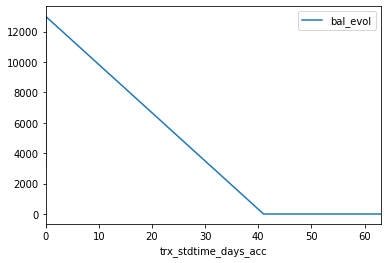

In [160]:
lna.plot(x="trx_stdtime_days_acc",y="bal_evol")

# Since these borrowing all seem to be one-time borrowings, let's analyse the average number of entries of these shylock borrowings. As a next step we want to also check the average number of days.

In [162]:
shylock_acc = shylock["account_ids"].unique()

In [165]:
shylock_acc[1]

'57136937210600000'

In [174]:
sl=pd.DataFrame({"acc": shylock_acc, "ent": np.zeros(len(shylock_acc))})

In [186]:
ent= 0
for index, row in sl.iterrows():
    if shylock[shylock["account_ids"]==row["acc"]].shape[0] == df[df["account_ids"]==row["acc"]].shape[0]:
        sl.at[index,"ent"] = shylock[shylock["account_ids"]==row["acc"]].shape[0]
    else: 
        print("the account shows up in non-shylock contexts")

In [188]:
sl["ent"].mean()

5.410256410256411

### This is higher than expected. Let's look at all the accounts that have a long shylock history.

In [190]:
sl[sl["ent"]>10]["acc"]

6     57134804438300000
10    59135098451800000
20    59134794913800000
27    65136911561400000
Name: acc, dtype: object

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Error neither increase nor decrease at index20735for account57134804438300000
Error neither increase nor decrease at index4795for account59135098451800000


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Error neither increase nor decrease at index11039for account59134794913800000
Error neither increase nor decrease at index23666for account65136911561400000


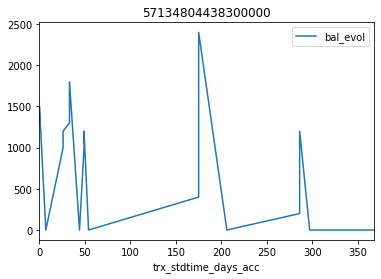

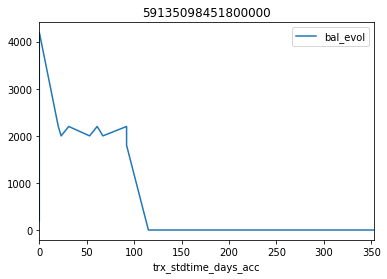

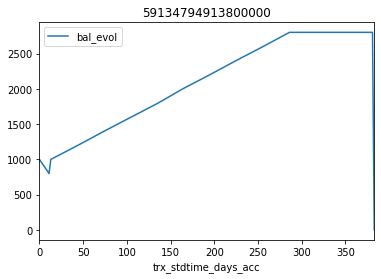

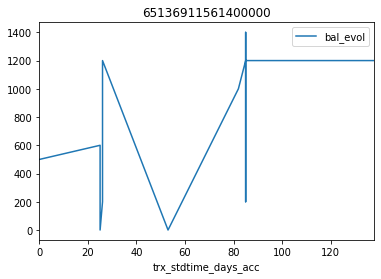

In [199]:
for acc in sl[sl["ent"]>10]["acc"]:
    lna = shylock[shylock["account_ids"]==acc]
    
    lna.sort_values("trx_stdtime_days_acc", inplace=True)
    
    lna.insert(58, "trx_val_dir",np.zeros(lna.shape[0]))
    
    for index, row in lna.iterrows():
        if lna.loc[index,"trx_bsheet_direction"]=="Increase":
            lna.at[index,"trx_val_dir"] = lna.loc[index,"trx_value_kes"]
        elif lna.loc[index,"trx_bsheet_direction"]=="Decrease":
            lna.at[index,"trx_val_dir"] = -lna.loc[index,"trx_value_kes"]
        else:
            print("Error neither increase nor decrease at index" + str(index) + "for account"+ str(acc))
        
    lna.insert(59,"bal_evol",np.zeros(lna.shape[0]))
    
    s=0
    for index,row in lna.iterrows():
        s+=lna.loc[index,"trx_val_dir"]
        lna.at[index,"bal_evol"]=s
    
    lna[["trx_stdtime_days_acc","trx_value_kes","trx_prx_purpose","trx_direction","trx_bsheet_direction","trx_date","trx_val_dir","bal_evol"]]
    
    lna.plot(x="trx_stdtime_days_acc",y="bal_evol",title=acc)


In [220]:
shylock[shylock["account_ids"]=="59135098451800000"].sort_values("trx_stdtime_days_acc")

,hh_ids,unique_hhs,first_trx_date_hh,last_trx_date_hh,tot_hh_daysofobs,tot_hh_monthsofobs,interview_designation,int_date,int_month,int_year,int_yr_mo,first_int_date,account_ids,unique_accnts,m_ids_owner,unique_hm_owner,account_bsheet_desig,account_startclose_balance,account_formal,account_liquid,first_trx_date_acc,last_trx_date_acc,tot_acc_daysofobs,tot_acc_monthsofobs,trx_id,m_ids_trx,trx_date,trx_month,trx_year,trx_yr_mo,trx_dq_round,trx_stdtime_days_hh,trx_stdtime_mnths_hh,trx_stdtime_days_acc,trx_stdtime_mnths_acc,trx_class_code,trx_class_desc,trx_family_code,trx_family_desc,trx_type_code,trx_type_desc,trx_prx_purpose,trx_prx_purpose_fd,trx_fee,trx_bsheet_direction,trx_mode_code,trx_mode_desc,trx_place_incommunity,trx_distance_km,trx_outlet,trx_direction,trx_value_kes,trx_value_usd,ddd_gift,trx_inkind_units,trx_inkind_value_usd,trx_inkind_value_kes,trx_stdtime_mnths_hh_nr
1251,KVIHC19,NaN,04sep2012,01nov2013,423,14,06=Cleaning interview,28sep2013,9,2013,2013_09,23aug2012,59135098451800000,NaN,59134327942800000,NaN,Liability,NaN,Informal,NaN,09oct2012,27sep2013,353,12,34139366502500000,59134327942800000,09oct2012,10,2012,2012_10,20.0,35,1,0,0,findev,"Borrowing, lending, savings or insurance media...",INFP2P,Informal P2P,3246,Moneylender or Shylock Borrowing,5. Interest accruing,NaN,0.0,Increase,16.0,Automatic,NaN,NaN,NaN,NaN,200.0,2.352941,0,NaN,NaN,NaN,1.206897
252395,KVIHC19,NaN,04sep2012,01nov2013,423,14,04=Diaries Interview,23oct2012,10,2012,2012_10,23aug2012,59135098451800000,1.0,59134327942800000,NaN,Liability,NaN,Informal,NaN,09oct2012,27sep2013,353,12,59135098470100000,59134327942800000,09oct2012,10,2012,2012_10,1.0,35,1,0,0,findev,"Borrowing, lending, savings or insurance media...",INFP2P,Informal P2P,3246,Moneylender or Shylock Borrowing,2. New borrowing,New borrowing on financial liability,0.0,Increase,1.0,Cash,1.0,0.0,13=Private individual or household,Inflow,4000.0,47.058820,0,NaN,NaN,NaN,1.206897
193085,KVIHC19,NaN,04sep2012,01nov2013,423,14,04=Diaries Interview,08nov2012,11,2012,2012_11,23aug2012,59135098451800000,NaN,59134327942800000,NaN,Liability,NaN,Informal,NaN,09oct2012,27sep2013,353,12,59135235812700000,59134327942800000,29oct2012,10,2012,2012_10,2.0,55,1,20,0,findev,"Borrowing, lending, savings or insurance media...",INFP2P,Informal P2P,3246,Moneylender or Shylock Borrowing,3. Payments,Repayment on financial liability,0.0,Decrease,1.0,Cash,1.0,0.0,13=Private individual or household,Outflow,2000.0,23.529410,0,NaN,NaN,NaN,1.896552
249931,KVIHC19,NaN,04sep2012,01nov2013,423,14,06=Cleaning interview,28sep2013,9,2013,2013_09,23aug2012,59135098451800000,NaN,59134327942800000,NaN,Liability,NaN,Informal,NaN,09oct2012,27sep2013,353,12,34139366516400000,59134327942800000,01nov2012,11,2012,2012_11,20.0,58,2,23,0,findev,"Borrowing, lending, savings or insurance media...",INFP2P,Informal P2P,3246,Moneylender or Shylock Borrowing,3. Payments,Repayment on financial liability,0.0,Decrease,1.0,Cash,1.0,0.0,13=Private individual or household,Outflow,200.0,2.352941,0,NaN,NaN,NaN,2.000000
16647,KVIHC19,NaN,04sep2012,01nov2013,423,14,06=Cleaning interview,28sep2013,9,2013,2013_09,23aug2012,59135098451800000,NaN,59134327942800000,NaN,Liability,NaN,Informal,NaN,09oct2012,27sep2013,353,12,34139366504800000,59134327942800000,09nov2012,11,2012,2012_11,20.0,66,2,31,1,findev,"Borrowing, lending, savings or insurance media...",INFP2P,Informal P2P,3246,Moneylender or Shylock Borrowing,5. Interest accruing,NaN,0.0,Increase,16.0,Automatic,NaN,NaN,NaN,NaN,200.0,2.352941,0,NaN,NaN,NaN,2.275862
59307,KVIHC19,NaN,04sep2012,01nov2013,423,14,06=Cleaning interview,28sep2013,9,2013,2013_09,23aug2012,59135098451800000,NaN,59134327942800000,NaN,Liability,NaN,Informal,NaN,09oct2012,27sep2013,353,12,34139366516400000,59134327942800000,01dec2012,12,2012,2012_12,20.0,88,3,53,1,findev,"Borrowing, lending, savings or insurance media...",INFP2P,Informal P2P,3246,Moneylender or Shylock Borrowing,3. Payments,Repayment on financial liability,0.0,Decrea

### From the second graph we can see that in order to find out the length of the loan, we should look at the first time the balance went to 0 and stayed there, rather than the last entry in the dataset.

## In the examples above we saw that a standard shylock loan has 4 entries: starting balance, interest, payment and closing balance. Let us check how many shylock loans are not in that format.

In [222]:
sl[~(sl["ent"]==4)]["acc"].count()

26

In [223]:
sl[(sl["ent"]==4)]["acc"].count()

13

In [224]:
sl[(sl["ent"]<4)]["acc"].count()

10

In [225]:
sl[(sl["ent"]<4)]["acc"]

1      57136937210600000
2      56135953213100000
5      59135945050400000
21     62134908978700000
24     63135109347100000
28    108136922432800000
30     61135081975900000
32     59134727035500000
33     59135867007700000
36    112137885839100000
Name: acc, dtype: object

In [226]:
shylock[shylock["account_ids"]=="57136937210600000"].sort_values("trx_stdtime_days_acc")

,hh_ids,unique_hhs,first_trx_date_hh,last_trx_date_hh,tot_hh_daysofobs,tot_hh_monthsofobs,interview_designation,int_date,int_month,int_year,int_yr_mo,first_int_date,account_ids,unique_accnts,m_ids_owner,unique_hm_owner,account_bsheet_desig,account_startclose_balance,account_formal,account_liquid,first_trx_date_acc,last_trx_date_acc,tot_acc_daysofobs,tot_acc_monthsofobs,trx_id,m_ids_trx,trx_date,trx_month,trx_year,trx_yr_mo,trx_dq_round,trx_stdtime_days_hh,trx_stdtime_mnths_hh,trx_stdtime_days_acc,trx_stdtime_mnths_acc,trx_class_code,trx_class_desc,trx_family_code,trx_family_desc,trx_type_code,trx_type_desc,trx_prx_purpose,trx_prx_purpose_fd,trx_fee,trx_bsheet_direction,trx_mode_code,trx_mode_desc,trx_place_incommunity,trx_distance_km,trx_outlet,trx_direction,trx_value_kes,trx_value_usd,ddd_gift,trx_inkind_units,trx_inkind_value_usd,trx_inkind_value_kes,trx_stdtime_mnths_hh_nr
23098,KMOMM18,NaN,04sep2012,28sep2013,389,13,04=Diaries Interview,22may2013,5,2013,2013_05,21aug2012,57136937210600000,1.0,57134433115100000,NaN,Liability,NaN,Informal,NaN,04may2013,26sep2013,145,5,57136937252500000,57134433115100000,04may2013,5,2013,2013_05,12.0,242,8,0,0,findev,"Borrowing, lending, savings or insurance media...",INFP2P,Informal P2P,3246,Moneylender or Shylock Borrowing,5. Interest accruing,NaN,0.0,Increase,1.0,Cash,NaN,NaN,NaN,NaN,4000.0,47.05882,0,NaN,NaN,NaN,8.344828
8129,KMOMM18,NaN,04sep2012,28sep2013,389,13,05=Module,28sep2013,9,2013,2013_09,21aug2012,57136937210600000,NaN,57134433115100000,NaN,Liability,NaN,Informal,NaN,04may2013,26sep2013,145,5,105140478784500000,57134433115100000,25sep2013,9,2013,2013_09,20.0,386,13,144,4,findev,"Borrowing, lending, savings or insurance media...",INFP2P,Informal P2P,3246,Moneylender or Shylock Borrowing,DECREASE--Unexplained balance adjustment,NaN,0.0,Decrease,19.0,CLOSING BALANCE,NaN,NaN,NaN,NaN,4000.0,47.05882,0,NaN,NaN,NaN,13.310340
269,KMOMM18,NaN,04sep2012,28sep2013,389,13,04=Diaries Interview,26sep2013,9,2013,2013_09,21aug2012,57136937210600000,NaN,57134433115100000,NaN,Liability,Close,Informal,NaN,04may2013,26sep2013,145,5,57138016717700000,57134433115100000,26sep2013,9,2013,2013_09,18.0,387,13,145,5,findev,"Borrowing, lending, savings or insurance media...",INFP2P,Informal P2P,3246,Moneylender or Shylock Borrowing,7. Closing Balance--End of last DQ,NaN,0.0,NaN,19.0,CLOSING BALANCE,NaN,NaN,NaN,NaN,0.0,0.00000,0,NaN,NaN,NaN,13.344830


#### Here there are 2 different closing balances, but no payment in between.

In [227]:
shylock[shylock["account_ids"]=="56135953213100000"].sort_values("trx_stdtime_days_acc")

,hh_ids,unique_hhs,first_trx_date_hh,last_trx_date_hh,tot_hh_daysofobs,tot_hh_monthsofobs,interview_designation,int_date,int_month,int_year,int_yr_mo,first_int_date,account_ids,unique_accnts,m_ids_owner,unique_hm_owner,account_bsheet_desig,account_startclose_balance,account_formal,account_liquid,first_trx_date_acc,last_trx_date_acc,tot_acc_daysofobs,tot_acc_monthsofobs,trx_id,m_ids_trx,trx_date,trx_month,trx_year,trx_yr_mo,trx_dq_round,trx_stdtime_days_hh,trx_stdtime_mnths_hh,trx_stdtime_days_acc,trx_stdtime_mnths_acc,trx_class_code,trx_class_desc,trx_family_code,trx_family_desc,trx_type_code,trx_type_desc,trx_prx_purpose,trx_prx_purpose_fd,trx_fee,trx_bsheet_direction,trx_mode_code,trx_mode_desc,trx_place_incommunity,trx_distance_km,trx_outlet,trx_direction,trx_value_kes,trx_value_usd,ddd_gift,trx_inkind_units,trx_inkind_value_usd,trx_inkind_value_kes,trx_stdtime_mnths_hh_nr
377,KELDK33,NaN,01sep2012,01nov2013,426,14,04=Diaries Interview,30jan2013,1,2013,2013_01,15sep2012,56135953213100000,1.0,56134364399500000,NaN,Liability,Start,Informal,NaN,30jan2013,01oct2013,244,8,56135953233200000,56134364399500000,30jan2013,1,2013,2013_01,6.0,151,5,0,0,findev,"Borrowing, lending, savings or insurance media...",INFP2P,Informal P2P,3246,Moneylender or Shylock Borrowing,1. Starting balance (today),NaN,0.0,Increase,18.0,STARTING BALANCE,NaN,NaN,NaN,NaN,2000.0,23.52941,0,NaN,NaN,NaN,5.206897
66203,KELDK33,NaN,01sep2012,01nov2013,426,14,04=Diaries Interview,09apr2013,4,2013,2013_04,15sep2012,56135953213100000,NaN,56134364399500000,NaN,Liability,NaN,Informal,NaN,30jan2013,01oct2013,244,8,84136547942600000,56134364399500000,05feb2013,2,2013,2013_02,7.0,157,5,6,0,findev,"Borrowing, lending, savings or insurance media...",INFP2P,Informal P2P,3246,Moneylender or Shylock Borrowing,3. Payments,Repayment on financial liability,0.0,Decrease,1.0,Cash,1.0,0.0,13=Private individual or household,Outflow,2000.0,23.52941,0,NaN,NaN,NaN,5.413793
6833,KELDK33,NaN,01sep2012,01nov2013,426,14,04=Diaries Interview,01oct2013,10,2013,2013_10,15sep2012,56135953213100000,NaN,56134364399500000,NaN,Liability,Close,Informal,NaN,30jan2013,01oct2013,244,8,105138130942900000,56134364399500000,01oct2013,10,2013,2013_10,19.0,395,13,244,8,findev,"Borrowing, lending, savings or insurance media...",INFP2P,Informal P2P,3246,Moneylender or Shylock Borrowing,7. Closing Balance--End of last DQ,NaN,0.0,NaN,19.0,CLOSING BALANCE,NaN,NaN,NaN,NaN,0.0,0.00000,0,NaN,NaN,NaN,13.620690


#### Here there are no interests.

In [228]:
shylock[shylock["account_ids"]=="59135945050400000"].sort_values("trx_stdtime_days_acc")

,hh_ids,unique_hhs,first_trx_date_hh,last_trx_date_hh,tot_hh_daysofobs,tot_hh_monthsofobs,interview_designation,int_date,int_month,int_year,int_yr_mo,first_int_date,account_ids,unique_accnts,m_ids_owner,unique_hm_owner,account_bsheet_desig,account_startclose_balance,account_formal,account_liquid,first_trx_date_acc,last_trx_date_acc,tot_acc_daysofobs,tot_acc_monthsofobs,trx_id,m_ids_trx,trx_date,trx_month,trx_year,trx_yr_mo,trx_dq_round,trx_stdtime_days_hh,trx_stdtime_mnths_hh,trx_stdtime_days_acc,trx_stdtime_mnths_acc,trx_class_code,trx_class_desc,trx_family_code,trx_family_desc,trx_type_code,trx_type_desc,trx_prx_purpose,trx_prx_purpose_fd,trx_fee,trx_bsheet_direction,trx_mode_code,trx_mode_desc,trx_place_incommunity,trx_distance_km,trx_outlet,trx_direction,trx_value_kes,trx_value_usd,ddd_gift,trx_inkind_units,trx_inkind_value_usd,trx_inkind_value_kes,trx_stdtime_mnths_hh_nr
359450,KVIHC12,NaN,08sep2012,04oct2013,391,13,04=Diaries Interview,29jan2013,1,2013,2013_01,27sep2012,59135945050400000,1.0,59134373356900000,NaN,Liability,NaN,Informal,NaN,18jan2013,02oct2013,257,8,59135945101000000,59134373356900000,18jan2013,1,2013,2013_01,5.0,132,4,0,0,findev,"Borrowing, lending, savings or insurance media...",INFP2P,Informal P2P,3246,Moneylender or Shylock Borrowing,2. New borrowing,New borrowing on financial liability,0.0,Increase,1.0,Cash,1.0,0.0,13=Private individual or household,Inflow,500.0,5.882353,0,NaN,NaN,NaN,4.551724
682,KVIHC12,NaN,08sep2012,04oct2013,391,13,06=Cleaning interview,03oct2013,10,2013,2013_10,27sep2012,59135945050400000,NaN,59134373356900000,NaN,Liability,NaN,Informal,NaN,18jan2013,02oct2013,257,8,34138261207500000,59134373356900000,01oct2013,10,2013,2013_10,20.0,388,13,256,8,findev,"Borrowing, lending, savings or insurance media...",INFP2P,Informal P2P,3246,Moneylender or Shylock Borrowing,5. Interest accruing,NaN,0.0,Increase,16.0,Automatic,NaN,NaN,NaN,NaN,1500.0,17.647060,0,NaN,NaN,NaN,13.379310
8500,KVIHC12,NaN,08sep2012,04oct2013,391,13,04=Diaries Interview,02oct2013,10,2013,2013_10,27sep2012,59135945050400000,NaN,59134373356900000,NaN,Liability,Close,Informal,NaN,18jan2013,02oct2013,257,8,59138081252000000,59134373356900000,02oct2013,10,2013,2013_10,19.0,389,13,257,8,findev,"Borrowing, lending, savings or insurance media...",INFP2P,Informal P2P,3246,Moneylender or Shylock Borrowing,7. Closing Balance--End of last DQ,NaN,0.0,NaN,19.0,CLOSING BALANCE,NaN,NaN,NaN,NaN,2000.0,23.529410,0,NaN,NaN,NaN,13.413790


#### Here they accrued a lot of interests, but never payed back.

In [229]:
shylock[shylock["account_ids"]=="62134908978700000"].sort_values("trx_stdtime_days_acc")

,hh_ids,unique_hhs,first_trx_date_hh,last_trx_date_hh,tot_hh_daysofobs,tot_hh_monthsofobs,interview_designation,int_date,int_month,int_year,int_yr_mo,first_int_date,account_ids,unique_accnts,m_ids_owner,unique_hm_owner,account_bsheet_desig,account_startclose_balance,account_formal,account_liquid,first_trx_date_acc,last_trx_date_acc,tot_acc_daysofobs,tot_acc_monthsofobs,trx_id,m_ids_trx,trx_date,trx_month,trx_year,trx_yr_mo,trx_dq_round,trx_stdtime_days_hh,trx_stdtime_mnths_hh,trx_stdtime_days_acc,trx_stdtime_mnths_acc,trx_class_code,trx_class_desc,trx_family_code,trx_family_desc,trx_type_code,trx_type_desc,trx_prx_purpose,trx_prx_purpose_fd,trx_fee,trx_bsheet_direction,trx_mode_code,trx_mode_desc,trx_place_incommunity,trx_distance_km,trx_outlet,trx_direction,trx_value_kes,trx_value_usd,ddd_gift,trx_inkind_units,trx_inkind_value_usd,trx_inkind_value_kes,trx_stdtime_mnths_hh_nr
4981,KNBOM37,NaN,01sep2012,31oct2013,425,14,06=Cleaning interview,30oct2013,10,2013,2013_10,16oct2012,62134908978700000,NaN,62134433909100000,NaN,Liability,Start,Informal,NaN,01sep2012,29oct2013,423,14,50139141881200000,62134433909100000,01sep2012,9,2012,2012_09,17.0,0,0,0,0,findev,"Borrowing, lending, savings or insurance media...",INFP2P,Informal P2P,3246,Moneylender or Shylock Borrowing,1. Starting balance (today),NaN,0.0,Increase,18.0,STARTING BALANCE,NaN,NaN,NaN,NaN,30000.0,352.9412,0,NaN,NaN,NaN,0.000000
292095,KNBOM37,NaN,01sep2012,31oct2013,425,14,06=Cleaning interview,30oct2013,10,2013,2013_10,16oct2012,62134908978700000,NaN,62134433909100000,NaN,Liability,NaN,Informal,NaN,01sep2012,29oct2013,423,14,50139148711500000,62134433909100000,30apr2013,4,2013,2013_04,17.0,241,8,241,8,findev,"Borrowing, lending, savings or insurance media...",INFP2P,Informal P2P,3246,Moneylender or Shylock Borrowing,3. Payments,Repayment on financial liability,0.0,Decrease,1.0,Cash,1.0,0.0,13=Private individual or household,Outflow,10000.0,117.6471,0,NaN,NaN,NaN,8.310345
6787,KNBOM37,NaN,01sep2012,31oct2013,425,14,04=Diaries Interview,29oct2013,10,2013,2013_10,16oct2012,62134908978700000,1.0,62134433909100000,NaN,Liability,Close,Informal,NaN,01sep2012,29oct2013,423,14,62138303017100000,62134433909100000,29oct2013,10,2013,2013_10,16.0,423,14,423,14,findev,"Borrowing, lending, savings or insurance media...",INFP2P,Informal P2P,3246,Moneylender or Shylock Borrowing,7. Closing Balance--End of last DQ,NaN,0.0,NaN,19.0,CLOSING BALANCE,NaN,NaN,NaN,NaN,20000.0,235.2941,0,NaN,NaN,NaN,14.586210


#### Again no interests.

## I don't want to look at all of them. Maybe we should just look at whether they payed the money back. But as we discussed, we do not know the conditions, so this does not seem fair. I am not sure what to do with the Shylock loans. They seem to be messier than the other ones.

# Exploration of 'Friends and family: Borrowing'

In [230]:
dfi[dfi["trx_type_desc"]=="Friends and family: Borrowing"].shape

(2073, 58)

In [231]:
ffb = dfi[dfi["trx_type_desc"]=="Friends and family: Borrowing"]

In [234]:
len(ffb["account_ids"].unique())

605

## Let's again look at a few accounts.

### 1. Family Borrowing

In [235]:
acc = random.choice(ffb["account_ids"].unique())

In [249]:
ffb[ffb["account_ids"]==acc].sort_values("trx_stdtime_days_acc")[["trx_stdtime_days_acc","trx_value_kes","trx_prx_purpose","trx_prx_purpose_fd","trx_direction","trx_bsheet_direction"]]

,trx_stdtime_days_acc,trx_value_kes,trx_prx_purpose,trx_prx_purpose_fd,trx_direction,trx_bsheet_direction
173400,0,1000.0,2. New borrowing,New borrowing on financial liability,Inflow,Increase
22489,5,0.0,1. Starting balance (today),NaN,NaN,Increase
311712,13,1000.0,3. Payments,Repayment on financial liability,Outflow,Decrease
21308,368,1000.0,INCREASE--Unexplained balance adjustment,NaN,NaN,Increase
16390,373,0.0,7. Closing Balance--End of last DQ,NaN,NaN,NaN


### 2. Family Borrowing

In [251]:
acc = random.choice(ffb["account_ids"].unique())

In [252]:
ffb[ffb["account_ids"]==acc].sort_values("trx_stdtime_days_acc")[["trx_stdtime_days_acc","trx_value_kes","trx_prx_purpose","trx_prx_purpose_fd","trx_direction","trx_bsheet_direction"]]

,trx_stdtime_days_acc,trx_value_kes,trx_prx_purpose,trx_prx_purpose_fd,trx_direction,trx_bsheet_direction
5593,0,0.0,1. Starting balance (today),NaN,NaN,Increase
4576,374,0.0,7. Closing Balance--End of last DQ,NaN,NaN,NaN


### 3. Family Borrowing

In [253]:
acc = random.choice(ffb["account_ids"].unique())

In [254]:
ffb[ffb["account_ids"]==acc].sort_values("trx_stdtime_days_acc")[["trx_stdtime_days_acc","trx_value_kes","trx_prx_purpose","trx_prx_purpose_fd","trx_direction","trx_bsheet_direction"]]

,trx_stdtime_days_acc,trx_value_kes,trx_prx_purpose,trx_prx_purpose_fd,trx_direction,trx_bsheet_direction
330693,0,2000.0,2. New borrowing,New borrowing on financial liability,Inflow,Increase
292472,54,1000.0,2. New borrowing,New borrowing on financial liability,Inflow,Increase
234299,75,3000.0,3. Payments,Repayment on financial liability,Outflow,Decrease
337868,164,2000.0,2. New borrowing,New borrowing on financial liability,Inflow,Increase
235434,180,2000.0,3. Payments,Repayment on financial liability,Outflow,Decrease
6754,312,0.0,7. Closing Balance--End of last DQ,NaN,NaN,NaN


### 4. Family Borrowing

In [255]:
acc = random.choice(ffb["account_ids"].unique())

In [256]:
ffb[ffb["account_ids"]==acc].sort_values("trx_stdtime_days_acc")[["trx_stdtime_days_acc","trx_value_kes","trx_prx_purpose","trx_prx_purpose_fd","trx_direction","trx_bsheet_direction"]]

,trx_stdtime_days_acc,trx_value_kes,trx_prx_purpose,trx_prx_purpose_fd,trx_direction,trx_bsheet_direction
36290,0,5000.0,2. New borrowing,New borrowing on financial liability,Inflow,Increase
393466,16,5400.0,3. Payments,Repayment on financial liability,Outflow,Decrease
94832,18,1000.0,2. New borrowing,New borrowing on financial liability,Inflow,Increase
19067,41,2000.0,1. Starting balance (today),NaN,NaN,Increase
269828,43,400.0,3. Payments,Repayment on financial liability,Outflow,Decrease
215646,56,3500.0,2. New borrowing,New borrowing on financial liability,Inflow,Increase
350201,75,3900.0,3. Payments,Repayment on financial liability,Outflow,Decrease
13632,101,400.0,5. Interest accruing,NaN,NaN,Increase
178143,108,400.0,3. Payments,Repayment on financial liability,Outflow,Decrease
264266,170,400.0,3. Payments,Repayment on financial liability,Outflow,Decrease


## Let's see if we can find some general information.

In [287]:
len(ffb["account_ids"].unique())

605

In [283]:
ffb["account_ids"].value_counts().mean()

3.4264462809917355

### How often each count appears.

In [285]:
ffb["account_ids"].value_counts().value_counts()

3     275
2     101
4      79
1      50
5      47
6      21
7      12
9       7
8       4
15      2
10      2
28      1
19      1
18      1
14      1
11      1
Name: account_ids, dtype: int64

#### About half of the accounts have 3 entries. Let's first look at these.

In [316]:
a = random.choice(ffb["account_ids"].value_counts()[ffb["account_ids"].value_counts() == 3].reset_index()["index"])

In [317]:
ffb[ffb["account_ids"]==a]

,hh_ids,unique_hhs,first_trx_date_hh,last_trx_date_hh,tot_hh_daysofobs,tot_hh_monthsofobs,interview_designation,int_date,int_month,int_year,int_yr_mo,first_int_date,account_ids,unique_accnts,m_ids_owner,unique_hm_owner,account_bsheet_desig,account_startclose_balance,account_formal,account_liquid,first_trx_date_acc,last_trx_date_acc,tot_acc_daysofobs,tot_acc_monthsofobs,trx_id,m_ids_trx,trx_date,trx_month,trx_year,trx_yr_mo,trx_dq_round,trx_stdtime_days_hh,trx_stdtime_mnths_hh,trx_stdtime_days_acc,trx_stdtime_mnths_acc,trx_class_code,trx_class_desc,trx_family_code,trx_family_desc,trx_type_code,trx_type_desc,trx_prx_purpose,trx_prx_purpose_fd,trx_fee,trx_bsheet_direction,trx_mode_code,trx_mode_desc,trx_place_incommunity,trx_distance_km,trx_outlet,trx_direction,trx_value_kes,trx_value_usd,ddd_gift,trx_inkind_units,trx_inkind_value_usd,trx_inkind_value_kes,trx_stdtime_mnths_hh_nr
9518,KNBOK27,NaN,14nov2012,28oct2013,348,12,06=Cleaning interview,29oct2013,10,2013,2013_10,05sep2012,89135935720300000,NaN,64134330145000000,NaN,Liability,Close,Informal,NaN,18jan2013,28oct2013,283,9,89138615841700000,64134330145000000,28oct2013,10,2013,2013_10,18.0,348,12,283,9,findev,"Borrowing, lending, savings or insurance media...",INFP2P,Informal P2P,2752,Friends and family: Borrowing,7. Closing Balance--End of last DQ,NaN,0.0,NaN,19.0,CLOSING BALANCE,NaN,NaN,NaN,NaN,0.0,0.00000,0,NaN,NaN,NaN,12.000000
425534,KNBOK27,NaN,14nov2012,28oct2013,348,12,04=Diaries Interview,28jan2013,1,2013,2013_01,05sep2012,89135935720300000,1.0,64134330145000000,NaN,Liability,NaN,Informal,NaN,18jan2013,28oct2013,283,9,89135935745400000,64134330145000000,18jan2013,1,2013,2013_01,2.0,65,2,0,0,findev,"Borrowing, lending, savings or insurance media...",INFP2P,Informal P2P,2752,Friends and family: Borrowing,2. New borrowing,New borrowing on financial liability,0.0,Increase,1.0,Cash,0.0,8.084722,13=Private individual or household,Inflow,3000.0,35.29412,0,NaN,NaN,NaN,2.241379
446620,KNBOK27,NaN,14nov2012,28oct2013,348,12,04=Diaries Interview,19feb2013,2,2013,2013_02,05sep2012,89135935720300000,NaN,64134330145000000,NaN,Liability,NaN,Informal,NaN,18jan2013,28oct2013,283,9,89136125660300000,64134330145000000,16feb2013,2,2013,2013_02,3.0,94,3,29,1,findev,"Borrowing, lending, savings or insurance media...",INFP2P,Informal P2P,2752,Friends and family: Borrowing,3. Payments,Repayment on financial liability,0.0,Decrease,1.0,Cash,0.0,8.084722,13=Private individual or household,Outflow,3000.0,35.29412,0,NaN,NaN,NaN,3.241379


### I assume that all of these have a new borrowing, a repayment and a closing balance. I will write a program to check this.
### Now I want to look at the very long ones.

In [318]:
ffb["account_ids"].value_counts()[ffb["account_ids"].value_counts() >10 ]

57137225366300000    28
57136574022700000    19
60136177195600000    18
61135780595200000    15
60135918356600000    15
89136060846900000    14
63135935605300000    11
Name: account_ids, dtype: int64

In [320]:
a = ffb["account_ids"].value_counts()[ffb["account_ids"].value_counts() >10 ].reset_index().loc[0,"index"]

In [325]:
ffb[ffb["account_ids"]==a].sort_values("trx_stdtime_days_acc")[["trx_stdtime_days_acc","trx_prx_purpose","trx_prx_purpose_fd","trx_value_kes","trx_bsheet_direction","trx_direction"]]

,trx_stdtime_days_acc,trx_prx_purpose,trx_prx_purpose_fd,trx_value_kes,trx_bsheet_direction,trx_direction
476372,0,2. New borrowing,New borrowing on financial liability,1000.0,Increase,Inflow
475250,4,2. New borrowing,New borrowing on financial liability,1000.0,Increase,Inflow
473295,6,3. Payments,Repayment on financial liability,2000.0,Decrease,Outflow
476508,14,2. New borrowing,New borrowing on financial liability,1300.0,Increase,Inflow
475933,38,3. Payments,Repayment on financial liability,1300.0,Decrease,Outflow
475125,175,2. New borrowing,New borrowing on financial liability,200.0,Increase,Inflow
475997,182,2. New borrowing,New borrowing on financial liability,500.0,Increase,Inflow
474926,188,3. Payments,Repayment on financial liability,700.0,Decrease,Outflow
475005,203,2. New borrowing,New borrowing on financial liability,600.0,Increase,Inflow
474162,220,3. Payments,Repayment on financial liability,600.0,Decrease,Outflow


### I think that here also it makes the most sense to consider having borrowed money and given it back a "plus".

# Exploration of 'Act of Money guard'

In [266]:
dfi[dfi["trx_type_desc"]=="Act as money guard"].shape

(449, 58)

In [267]:
len(dfi[dfi["trx_type_desc"]=="Act as money guard"]["account_ids"].unique())

77

In [268]:
mg = dfi[dfi["trx_type_desc"]=="Friends and family: Borrowing"]

In [269]:
len(mg["account_ids"].unique())

605

## Let's again look at a few accounts.

### 1. Act as money guard

In [270]:
acc = random.choice(mg["account_ids"].unique())

In [271]:
mg[mg["account_ids"]==acc].sort_values("trx_stdtime_days_acc")[["trx_stdtime_days_acc","trx_value_kes","trx_prx_purpose","trx_prx_purpose_fd","trx_direction","trx_bsheet_direction"]]

,trx_stdtime_days_acc,trx_value_kes,trx_prx_purpose,trx_prx_purpose_fd,trx_direction,trx_bsheet_direction
345169,0,200.0,3. Payments,Repayment on financial liability,Outflow,Decrease
22420,368,200.0,INCREASE--Unexplained balance adjustment,NaN,NaN,Increase
10150,369,0.0,7. Closing Balance--End of last DQ,NaN,NaN,NaN


### 2. Act as money guard

In [272]:
acc = random.choice(mg["account_ids"].unique())

In [273]:
mg[mg["account_ids"]==acc].sort_values("trx_stdtime_days_acc")[["trx_stdtime_days_acc","trx_value_kes","trx_prx_purpose","trx_prx_purpose_fd","trx_direction","trx_bsheet_direction"]]

,trx_stdtime_days_acc,trx_value_kes,trx_prx_purpose,trx_prx_purpose_fd,trx_direction,trx_bsheet_direction
452788,0,2000.0,2. New borrowing,New borrowing on financial liability,Inflow,Increase
53407,10,2000.0,3. Payments,Repayment on financial liability,Outflow,Decrease
12888,312,0.0,7. Closing Balance--End of last DQ,NaN,NaN,NaN


### 3. Act as money guard

In [276]:
acc = random.choice(mg["account_ids"].unique())

In [277]:
mg[mg["account_ids"]==acc].sort_values("trx_stdtime_days_acc")[["trx_stdtime_days_acc","trx_value_kes","trx_prx_purpose","trx_prx_purpose_fd","trx_direction","trx_bsheet_direction"]]

,trx_stdtime_days_acc,trx_value_kes,trx_prx_purpose,trx_prx_purpose_fd,trx_direction,trx_bsheet_direction
11564,0,1000.0,1. Starting balance (today),NaN,NaN,Increase
107086,41,1000.0,3. Payments,Repayment on financial liability,Outflow,Decrease
360842,316,150.0,2. New borrowing,New borrowing on financial liability,Inflow,Increase
273336,341,150.0,3. Payments,Repayment on financial liability,Outflow,Decrease
23510,369,0.0,7. Closing Balance--End of last DQ,NaN,NaN,NaN


### 4. Act as money guard

In [278]:
acc = random.choice(mg["account_ids"].unique())

In [281]:
print(acc)

61136336195000000


In [280]:
mg[mg["account_ids"]==acc].sort_values("trx_stdtime_days_acc")[["trx_stdtime_days_acc","trx_value_kes","trx_prx_purpose","trx_prx_purpose_fd","trx_direction","trx_bsheet_direction"]]

,trx_stdtime_days_acc,trx_value_kes,trx_prx_purpose,trx_prx_purpose_fd,trx_direction,trx_bsheet_direction
288246,0,200.0,2. New borrowing,New borrowing on financial liability,Inflow,Increase
21013,33,200.0,6. Loan written off,NaN,NaN,Decrease
474006,44,500.0,2. New borrowing,New borrowing on financial liability,Inflow,Increase
6057,91,500.0,6. Loan written off,NaN,NaN,Decrease
19284,220,0.0,7. Closing Balance--End of last DQ,NaN,NaN,NaN


#### I believe that for these "loans", we could just look at whether they payed the money they were guarding back or not (again in a certain time?). This again does not seem accurate. We could add a point when they pay it back over the period, but not directly penalize it when they did not?

# To look at: Pawning assets, Supplier credit, Okoa Jahazi